In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ejercicio de regresión
**Facundo A. Lucianna - Inteligencia Artificial - CEIA - FIUBA**

Se quiere determinar la relación entre la concentración de cierto fármaco en el torrente sanguíneo y el tiempo transcurrido desde que se administró el fármaco. Se recopila datos sobre la concentración de la droga en el torrente sanguíneo en diferentes intervalos de tiempo después de la administración.

In [12]:
dataset = pd.read_csv("datasets/drug.csv") # cargando los datos desde un csv
dataset.head(10) 

,Time,Concentration
0,0.000000,98.607801
1,0.200930,98.640061
2,0.246241,91.323087
3,0.303356,85.141347
4,0.364378,93.402487
5,0.378042,89.197027
6,0.417262,91.931610
7,0.526640,90.533796
8,0.671365,81.727693
9,0.703716,81.126258


In [13]:
dataset.describe()

,Time,Concentration
count,50.000000,50.000000
mean,1.837241,61.162161
std,1.122143,23.448881
min,0.000000,13.684360
25%,1.002335,42.859060
50%,1.646105,63.195569
75%,2.808956,80.721376
max,4.000000,98.640061


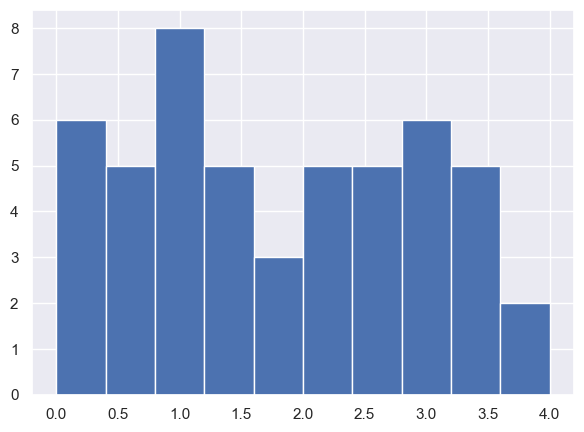

In [14]:
# Pandas nos da algunas herramientas de graficado
plt.figure(figsize=(7, 5))
#dataset.Time.hist()
dataset["Time"].hist()
plt.show()

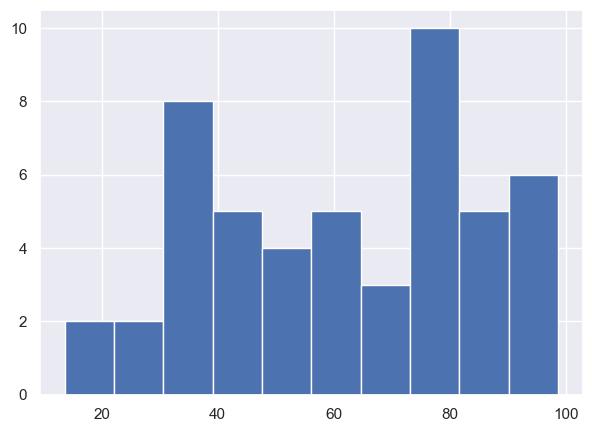

In [5]:
plt.figure(figsize=(7, 5))
dataset.Concentration.hist()
plt.show()

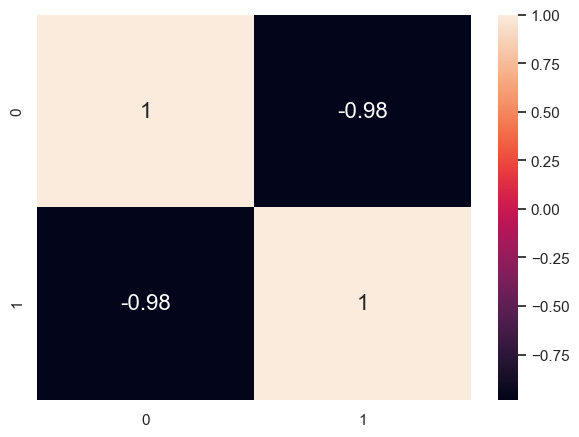

In [15]:
# podemos ver cuál es la relación entre ambas variables....
plt.figure(figsize=(7, 5))
correlacion_drug = np.corrcoef(dataset["Time"], dataset["Concentration"])
sns.heatmap(data=correlacion_drug, annot=True, annot_kws={"size": 16})
plt.show()

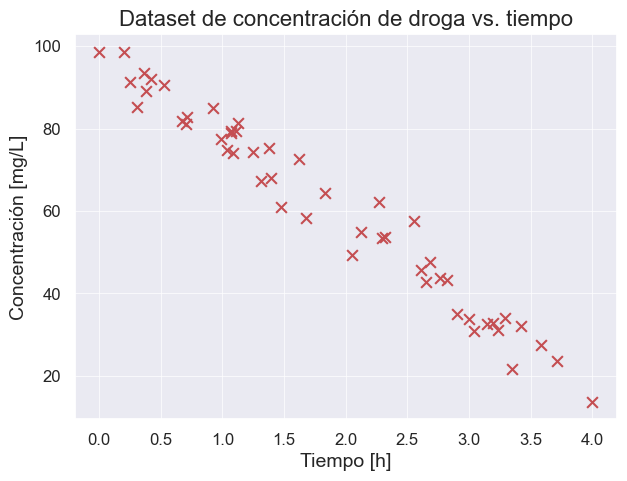

In [16]:
# Graficamos el dataset
plt.figure(figsize=(7, 5))
plt.scatter(dataset['Time'], dataset['Concentration'] , color='r', marker="x", s=60)
plt.grid(True, linewidth=0.5)
plt.xlabel('Tiempo [h]', fontsize=14)
plt.ylabel('Concentración [mg/L]', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Dataset de concentración de droga vs. tiempo', fontsize=16)
plt.show()

Ya tenemos los datos y de hecho vemos que hay una relación lineal entre las dos variables, por lo tanto, asumimos que es podemos usar **regresion lineal simple** (ya que hay una variable independiente y otra dependiente) para poder resolver nuestro problema.

Ahora vamos a armar nuestro modelo, para ello vamos a utilizar el proceso que vimos de Machine Learning

![proceso ML](./img/proceso_ml.png)

Es decir, necesitaremos datos de entrenamiento y datos de test. Esto se puede hacer facilmente con la libreria **scikit-learn** que nos permite separar nuestros datos para entrenar y para testear el funcionamiento de nuestro modelo.

Puedes también visitar la pagina de scikit-learn [Aca](https://scikit-learn.org/stable/).

In [17]:
# importando módulo para separar datos de entrenamiento y testeo de scikit-learn
from sklearn.model_selection import train_test_split

In [18]:
# Armamos un DataFrame con los features
X = dataset[["Time"]]
# Y con la variable dependiente (target)
y = dataset["Concentration"]

In [19]:
# valores de X
type(X)

pandas.core.frame.DataFrame

In [20]:
# valores de y
y.head()

0    98.607801
1    98.640061
2    91.323087
3    85.141347
4    93.402487
Name: Concentration, dtype: float64

In [21]:
# Cantidad de elementos en X y en y
print("Cantidad de elementos en 'X':", X.shape)
print("Cantidad de elementos en 'y':", y.shape)

Cantidad de elementos en 'X': (50, 1)
Cantidad de elementos en 'y': (50,)


Separamos el dataset de entrenamiento y testeo. Para este problema usamos el tamaño del test de 30% aprox.

In [22]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Datos de train y de test
print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 35
Valores de y_train: 35
Valores de X_test: 15
Valores de y_test: 15


Para aplicar el modelo de regresión lineal, la forma de implementarlo usando **scikit-learn**, parámetros y formas de uso la podemos encontrar [aca](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [24]:
# Creando el modelo de regresión lineal simple:
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()

In [25]:
# Y lo entrenamos, con el set de entrenamiento
regresion.fit(X_train, y_train)

LinearRegression()

In [26]:
# Una vez entrenado, podemos ver diferente información del modelo:
print(f"El valor de la intersección de la recta sera {regresion.intercept_ }")
print(f"El valor del coeficiente de la recta sera {regresion.coef_ }")
print(f"La ecuación de la recta entonces sera la siguiente: y = {regresion.intercept_ }+({regresion.coef_[0]})X")

El valor de la intersección de la recta sera 99.52593616837214
El valor del coeficiente de la recta sera [-20.75590118]
La ecuación de la recta entonces sera la siguiente: y = 99.52593616837214+(-20.755901181716165)X


In [27]:
print(f"El coeficiente de Pearson es {regresion.score(X_train, y_train)}")

El coeficiente de Pearson es 0.973206000703601


In [28]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train))**2))/(y_train.size - 2))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 4.00958477124656


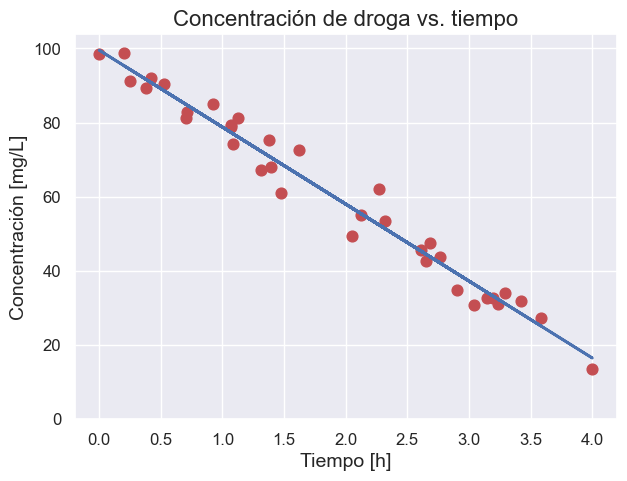

In [29]:
# Y si lo graficamos? Graficar siempre nos dara una mejor idea de lo que sucede
plt.figure(figsize=(7, 5))
plt.title('Concentración de droga vs. tiempo', fontsize=16)
plt.xlabel('Tiempo [h]', fontsize=14)
plt.ylabel('Concentración [mg/L]', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.scatter(X_train, y_train, color='r', marker="o", s=60)
plt.plot(X_train, regresion.predict(X_train), color="b", linewidth=2)

plt.ylim(0)  # Establece el límite inferior del eje y en cero
plt.show()

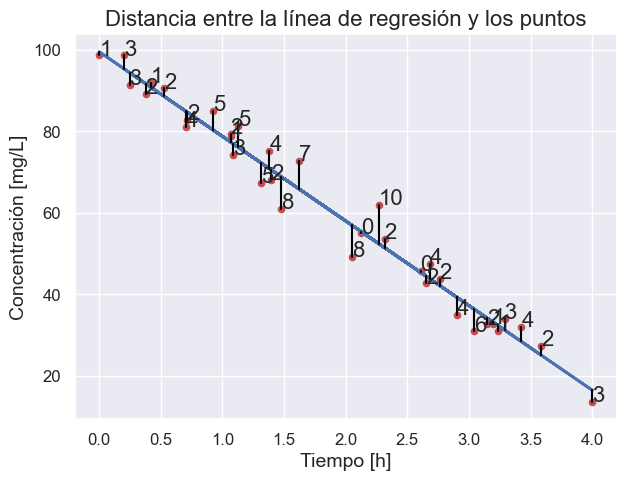

In [30]:
# Convertir X_train en un vector unidimensional
X_train = X_train.to_numpy().flatten()

# Regresión lineal usando Numpy
regression = np.polyfit(X_train, y_train, 1)
regression_line = np.polyval(regression, X_train)

# Calcular las distancias entre los puntos y la línea de regresión
distances = np.abs(regression_line - y_train)

# Graficar los puntos
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color='r', s=20)

# Graficar la línea de regresión
plt.plot(X_train, regression_line, color='b', linewidth=2)

# Graficar las líneas perpendiculares desde cada punto a la línea de regresión
for x, y, distance in zip(X_train, y_train, distances):
    plt.plot([x, x], [y, regression[0]*x + regression[1]], color='black', linestyle='-')
    plt.text(x, y, f'{distance:.0f}', ha='left', va="baseline", fontsize=16)

# Configuraciones adicionales
plt.title("Distancia entre la línea de regresión y los puntos", fontsize=16)
plt.xlabel('Tiempo [h]', fontsize=14)
plt.ylabel('Concentración [mg/L]', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Mostrar el gráfico
plt.show()

----
## Metricas

Entrenamos el modelo, pero para validar si está bien entrenado, debemos usar el dataset de testeo. 

Vamos a aplicar las siguientes métricas de evaluación usando scikit-learn:
- R2
- MAE
- MSE
- RMSE
- MAPE
- MPE

In [31]:
#Primero obtenemos las predicciones del modelo
y_pred = regresion.predict(X_test)

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [33]:
#scikit-learn no tiene el error porcentual medio (MPE) lo vamos a crear nosotros
def mean_porcentual_error(yreal, ypred):

    return np.mean((yreal-ypred)/yreal)

In [34]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)

In [35]:
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print(f"Error absoluto porcentual medio: {mape*100:.2f}%")
print(f"Error porcentual medio: {mpe*100:.2f}%")

R-cuadrado en test: 0.9485007402398677
Error absoluto medio: 3.928969082277494
Error cuadratico medio: 24.514257040665704
Raiz de error cuadratico medio: 4.951187437440205
Error absoluto porcentual medio: 8.26%
Error porcentual medio: -2.63%


Estas no son las únicas métricas que se pueden calcular. Scikit-learn documenta varias [métricas de regresión](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Una vez que tenemos el modelo, y estamos conforme, podemos guardarlo:

In [36]:
# Podemos utilizar pickle, existen otras herramientas, pero con esto bastará.
import pickle

with open('modelo_regresion_lineal.pkl', 'wb') as archivo:
    pickle.dump(regresion, archivo)

In [37]:
#Podemos llamarlo para usarlo con otros valores y predecir según lo que nosotros queremos.
with open('modelo_regresion_lineal.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

In [38]:
# Pasándole nuevos datos a por predecir... ¡Ojo con la forma de pasarlos!
X_pred = np.array([ [1], [3.5] ]) # Quiero predecir valores para 1 y 3 horas y media

predicciones = modelo_cargado.predict(X_pred) 
predicciones

C:\Users\m20_d\anaconda3\envs\ia_ceiot10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([78.77003499, 26.88028203])

----
## Regresión lineal multiple

Aunque se usó un ejemplo de una regresión lineal simple, todo lo que vimos sirve exactamente para un problema n-dimensional.

Este dataset proviene de [acá](https://www.kaggle.com/datasets/farhanmd29/50-startups). Este conjunto de datos tiene datos recopilados de Nueva York, California y Florida sobre 50 empresas emergentes. Las variables utilizadas en el conjunto de datos son ganancias, gasto en I+D, gasto administrativo y gasto en marketing. 

Queremos predecir la ganancia usando las otras variables. Pero tenemos un problema inicial

In [39]:
dataset = pd.read_csv("datasets/50_Startups.csv") 
dataset.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Vemos que *State* es una variable categorica.

In [41]:
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [42]:
dataset["State"].nunique()

3

In [43]:
dataset["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

Como hacemos para introducir una variable categórica en un modelo matemático? Usando variables Dummies.

In [44]:
dataset_with_dummies = pd.get_dummies(data=dataset, columns=['State'])

In [45]:
dataset_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [46]:
# Convertimos en floats
dataset_with_dummies = dataset_with_dummies.astype('float')
dataset_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


Esto lo pueden hacer también con scikit-learn usando LabelEncoder, OneHotEncoder, make_column_transformer.

In [47]:
#Quitamos una columna de las variables dummy
dataset_with_dummies = pd.get_dummies(data=dataset, columns=['State'], drop_first=True)

In [48]:
dataset_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


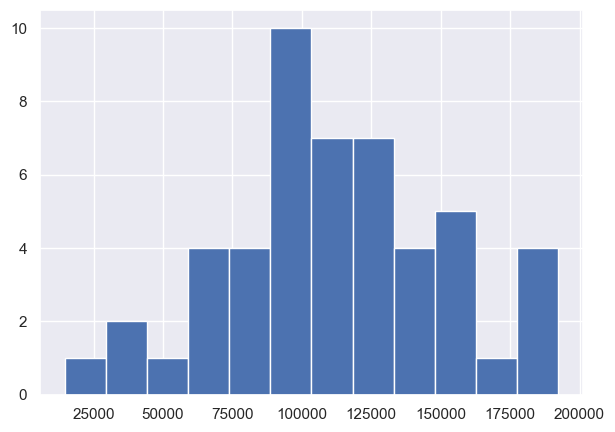

In [49]:
plt.figure(figsize=(7, 5))
dataset["Profit"].hist(bins=12)
plt.show()

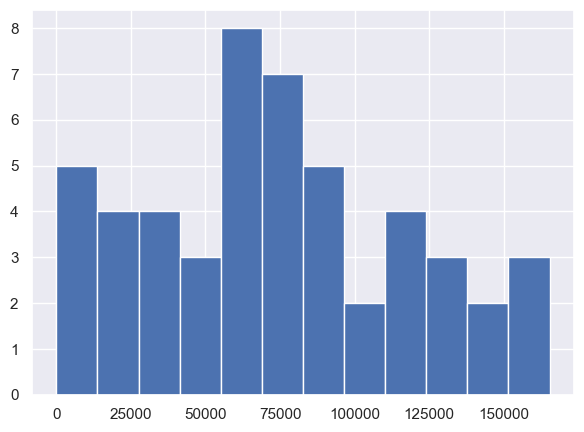

In [50]:
plt.figure(figsize=(7, 5))
dataset["R&D Spend"].hist(bins=12)
plt.show()

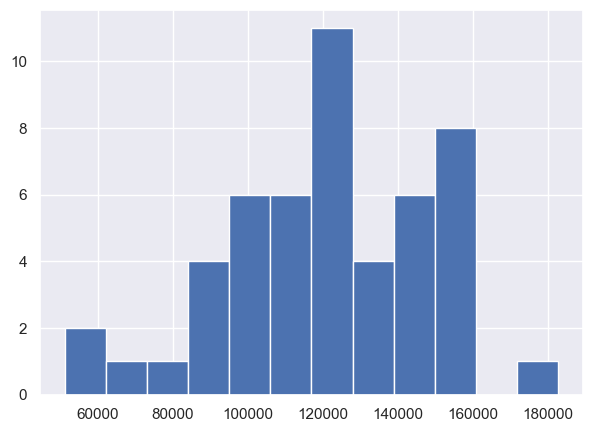

In [51]:
plt.figure(figsize=(7, 5))
dataset["Administration"].hist(bins=12)
plt.show()

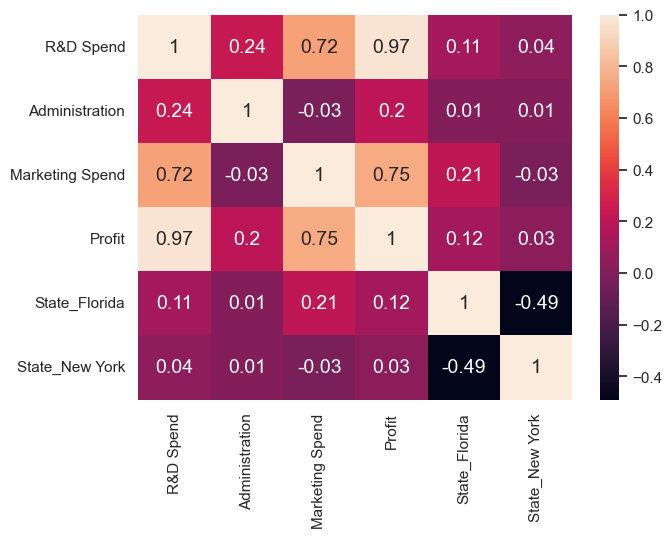

In [52]:
# Podemos ver cuál es la relación entre variables, recordemos, es mejor con la variable objetivo, pero malo si es entre variables de entrada....
plt.figure(figsize=(7, 5))
correlacion_profit = dataset_with_dummies.corr().round(2)
sns.heatmap(data=correlacion_profit, annot=True, annot_kws={"size": 14})
plt.show()

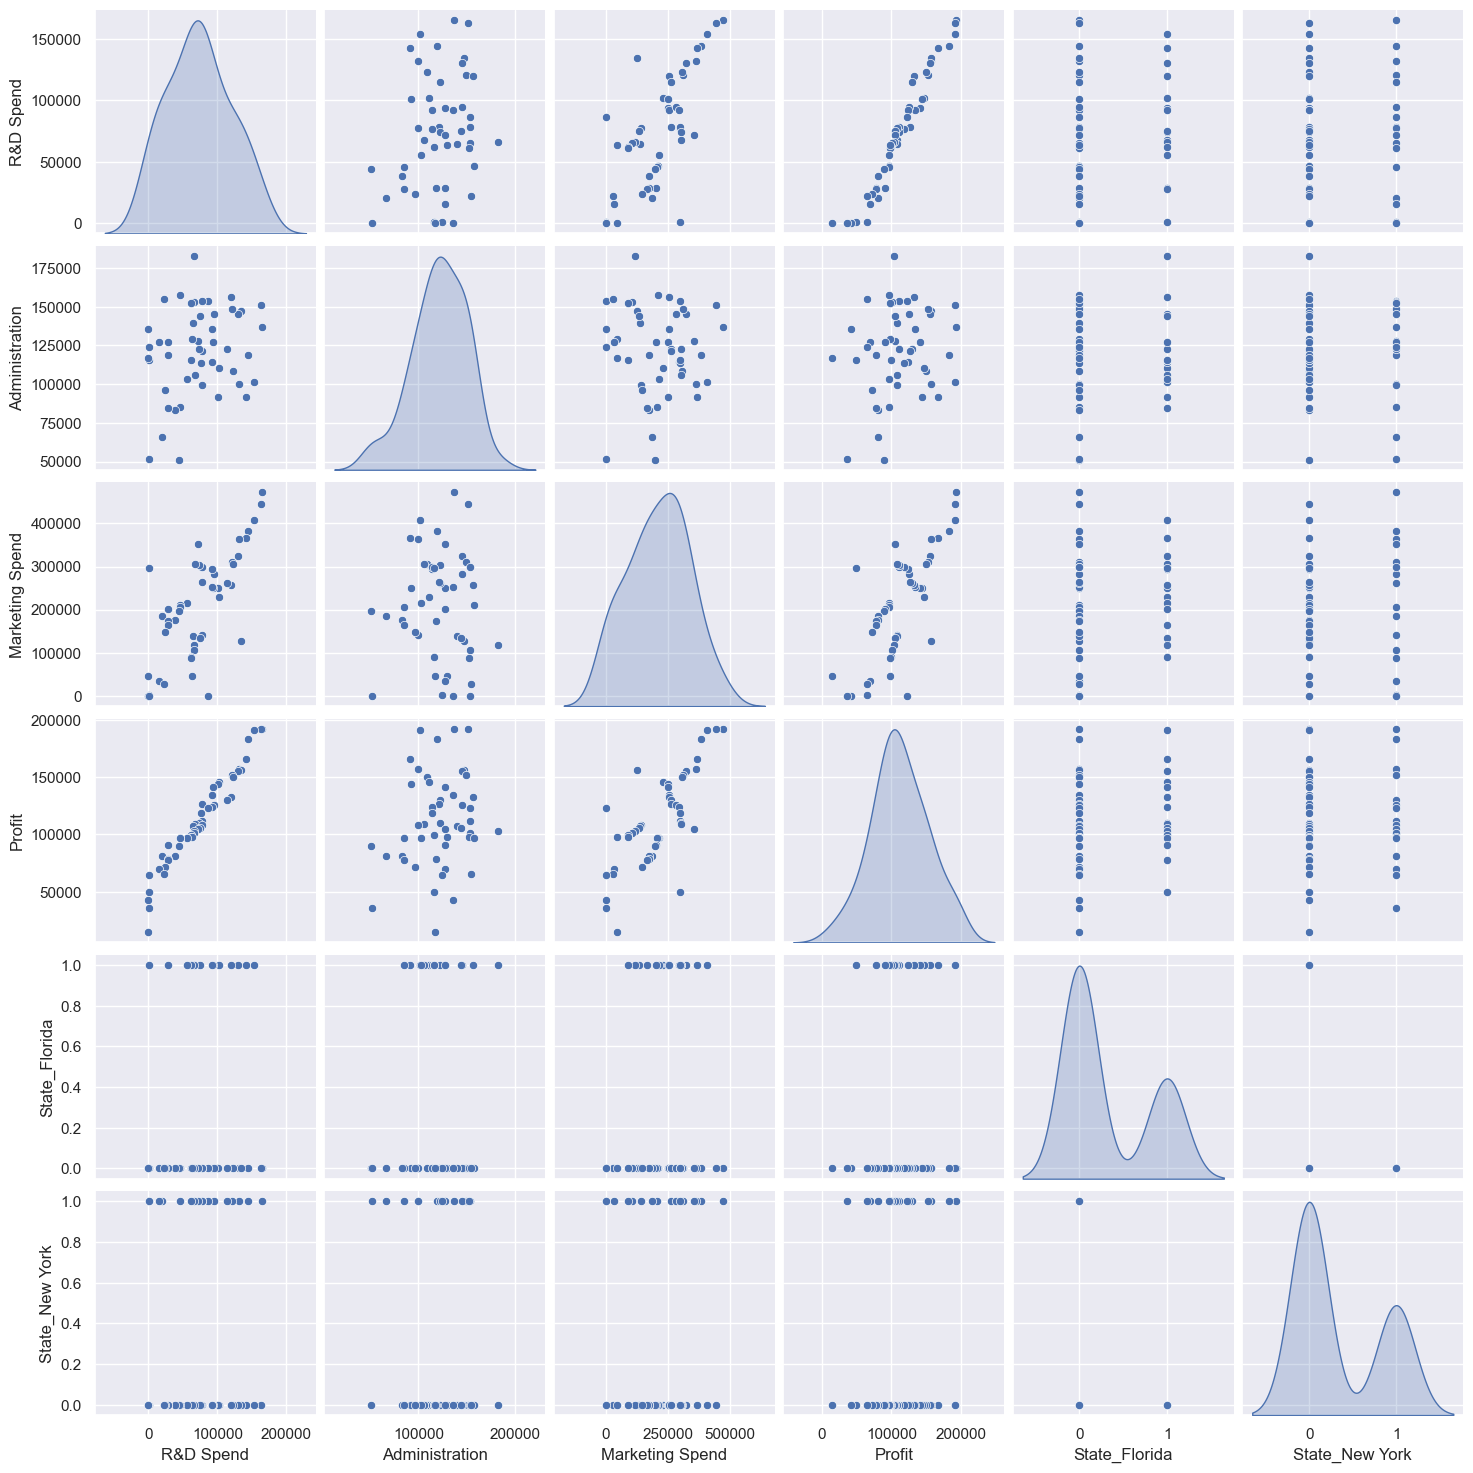

In [53]:
sns.pairplot(data=dataset_with_dummies, diag_kind="kde");

Porque tengo muchas variables no significa que debo aplicarla al modelo sin ningún criterio. Como vemos, hay variables que están correlacionadas que nos pueden dar problemas.

Recordemos la maxima: *Garbage in -> garbage out*.

Además, muchas variables es problema a futuro. Nos puede dificultar los pipelines y hacer más difícil de entender los datos.

### Apliquemos la regresión

In [54]:
# Armamos un DataFrame con los features
X = dataset_with_dummies.drop(columns='Profit')
# Y con la variable dependiente (target)
y = dataset_with_dummies["Profit"]

In [55]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Datos de train y de test
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (35, 5)
Valores de y_train: 35
Dimension de X_test: (15, 5)
Valores de y_test: 15


Los valores de los atributos numéricos son de similar escala, pero las variables dummies están a muy diferente escala, apliquemos un método de [estandarización](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): 

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)

print(f"Las medias del escalador es {sc_X.mean_}")

Las medias del escalador es [7.32159386e+04 1.23095166e+05 2.26343801e+05 3.42857143e-01
 3.14285714e-01]


In [58]:
print(f"Los desvío estándar del escalador es {np.sqrt(sc_X.var_)}")

Los desvío estándar del escalador es [4.68882205e+04 2.54624539e+04 1.15295288e+05 4.74664221e-01
 4.64230766e-01]


In [59]:
# Escalemos el set de testeo
X_test_scaled = sc_X.transform(X_test)

In [60]:
# StandardScaler transforma el DataFrame en un array de Numpy
X_train_scaled

array([[ 1.30948713,  0.94663711, -0.85542942, -0.72231512, -0.6770032 ],
       [-0.96661844, -1.50749007, -0.53664892,  1.38443731, -0.6770032 ],
       [-1.53344439, -0.28587018,  0.61382091,  1.38443731, -0.6770032 ],
       [-1.56149962,  0.48431128, -1.96316611, -0.72231512, -0.6770032 ],
       [ 0.88098185, -0.01878555,  0.30731897, -0.72231512,  1.47709789],
       [ 1.06890261, -0.56616681,  0.68205579, -0.72231512, -0.6770032 ],
       [ 0.1023108 , -0.05881665,  0.32960808, -0.72231512, -0.6770032 ],
       [ 0.0816425 , -0.9352526 , -0.74390717, -0.72231512,  1.47709789],
       [-0.57135605,  1.35881459, -0.13483753, -0.72231512, -0.6770032 ],
       [-0.25762459,  1.16276121, -1.19801576, -0.72231512,  1.47709789],
       [ 1.96495539,  0.54207791,  2.12879731, -0.72231512,  1.47709789],
       [-1.0885079 ,  1.24540132, -1.71740828, -0.72231512, -0.6770032 ],
       [-0.02363789,  0.18731045,  1.10013177, -0.72231512,  1.47709789],
       [-0.37796249, -0.78694993, -0.1

In [61]:
regresion = LinearRegression()

regresion.fit(X_train_scaled, y_train)

print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {regresion.coef_ }")

El valor de la interseccion de la recta sera 111235.21314285714
Los valores de los coeficientes de la recta sera [37742.0772359  -2323.64523934  3236.02541427   217.42980741
  -573.39775573]


In [62]:
print(f"El coeficiente de Pearson es {regresion.score(X_train_scaled, y_train)}")

El coeficiente de Pearson es 0.9511471170962384


In [54]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train_scaled))**2))/(y_train.size-6))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 9921.136313797115


El desvío estándar es con respecto a la escala del target

In [55]:
print(f"Desvío estándar del label {np.std(y_train)}")

Desvío estándar del label 40858.39426459892


In [56]:
#Otenemos las predicciones del modelo
y_pred = regresion.predict(X_test_scaled)

In [57]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)

In [58]:
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print(f"Error absoluto porcentual medio: {mape*100:.2f}%")
print(f"Error porcentual medio: {mpe*100:.2f}%")

R-cuadrado en test: 0.9397108063355787
Error absoluto medio: 7395.433531523905
Error cuadratico medio: 84826955.03533405
Raiz de error cuadratico medio: 9210.154995185154
Error absoluto porcentual medio: 8.93%
Error porcentual medio: 0.20%


----
### Selección de modelo

Para seleccionar el modelo, vamos a usar una técnica de eliminación hacia atrás y usando el criterio de información de Aikake (AIC) y criterio de información bayesiano (BIC). Como scikit-learn no nos da esas métricas para calcular, armamos una función que incorpora esto (esta función solo es válida para regresiones lineales).

Otra herramienta para hacer selección de modelos es utilizar una libreria especializada en herramientas estadísticas, llamada [statsmodels](https://www.statsmodels.org/stable/index.html) que automáticamente realiza la bondad de ajuste, junto al cálculo de diferentes métricas, que nos puede ayudar. 

In [59]:
def criterion(X, y, y_pred):
    # Agregamos uno porque hay que incorporar a la ordenada al origen
    d = X.shape[1]+1
    N = X.shape[0]

    # Calculamos los residuos al cuadrado
    residuals = y - y_pred
    Se = np.sum(residuals**2)
    # Se/N es la estimación de la varianza si los residuos provienen
    # de una normal con media cero.

    # Calculamos la estimación del logaritmo de maxima similitud de la regresión lineal
    log_lik = np.log(2*np.pi) + np.log(Se/N) + 1
    log_lik *= -N/2

    #Calculamos ambos criterios
    aic = 2*d - 2*log_lik 
    bic = d*np.log(N) - 2*log_lik
   
    return aic, bic

Armamos el dataset para entrenar los modelos

In [60]:
# Recuperamos las columnas en X_train_scaled y X_test_scaled
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [61]:
X_train_scaled.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,1.309487,0.946637,-0.855429,-0.722315,-0.677003
1,-0.966618,-1.507490,-0.536649,1.384437,-0.677003
2,-1.533444,-0.285870,0.613821,1.384437,-0.677003
3,-1.561500,0.484311,-1.963166,-0.722315,-0.677003
4,0.880982,-0.018786,0.307319,-0.722315,1.477098


Las columnas de los arrays `X`, `X_train_scaled`, `X_test_scaled` son:
- 0: `'R&D Spend'`
- 1: `'Administration'`
- 2: `'Marketing Spend'`
- 3: `'State_Florida'`
- 4: `'State_New_York'`

Por lo que seleccionaremos los atributos en función de estos números. 

Armamos el modelo con todos los atributos y calculamos los criterios, para esto usamos siempre el set de entrenamiento:

In [62]:
regresion = LinearRegression()
regresion.fit(X_train_scaled, y_train)
y_pred = regresion.predict(X_train_scaled)

aic, bic = criterion(X_train_scaled, y_train, y_pred)

print(f"AIC inicial es {np.round(aic)}")
print(f"BIC inicial es {np.round(bic)}")

AIC inicial es 749.0
BIC inicial es 758.0


Ahora creaos una función que dado una selección de columnas, entrena un modelo y obtiene AIC y BIC, esto nos va a facilitar ir avanzando paso a paso:

In [63]:
def train_reg_model(X, y, columns):

    # Quitamos las columnas
    X_clear = X.loc[:, columns].copy()
    
    model = LinearRegression()
    model.fit(X_clear, y)
    y_pred = model.predict(X_clear)

    return criterion(X_clear, y, y_pred)

Ahora creamos 5 modelos distintos, quitando para cada caso un atributo, y vemos el resultado de AIC y BIC

In [64]:
aic, bic = train_reg_model(X_train_scaled, y_train, ['Administration', 'Marketing Spend', 
                                                     'State_Florida', 'State_New York'])

print(f"Sacamos a {X_train_scaled.columns[0]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Marketing Spend', 
                                                     'State_Florida', 'State_New York'])

print(f"Sacamos a {X_train_scaled.columns[1]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Administration', 
                                                     'State_Florida', 'State_New York'])

print(f"Sacamos a {X_train_scaled.columns[2]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Administration', 'Marketing Spend', 
                                                     'State_New York'])

print(f"Sacamos a {X_train_scaled.columns[3]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Administration', 'Marketing Spend', 
                                                     'State_Florida'])

print(f"Sacamos a {X_train_scaled.columns[4]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

Sacamos a R&D Spend, el modelo nos da:
AIC 820.5
BIC 828.3
Sacamos a Administration, el modelo nos da:
AIC 748.8
BIC 756.6
Sacamos a Marketing Spend, el modelo nos da:
AIC 748.7
BIC 756.4
Sacamos a State_Florida, el modelo nos da:
AIC 746.9
BIC 754.7
Sacamos a State_New York, el modelo nos da:
AIC 747.0
BIC 754.8


Vemos que quitando `'State_Florida'` el modelo mejora más (tanto viendo AIC como BIC, recordar menor es mejor). Pasa de 749 a 746.9. Seguimos quitando columnas y viendo cuanto mejora el modelo:

In [65]:
aic, bic = train_reg_model(X_train_scaled, y_train, ['Administration', 'Marketing Spend', 'State_New York'])

print(f"Sacamos a {X_train_scaled.columns[0]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Marketing Spend', 'State_New York'])

print(f"Sacamos a {X_train_scaled.columns[1]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Administration', 'State_New York'])

print(f"Sacamos a {X_train_scaled.columns[2]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Administration', 'Marketing Spend'])

print(f"Sacamos a {X_train_scaled.columns[4]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

Sacamos a R&D Spend, el modelo nos da:
AIC 819.0
BIC 825.2
Sacamos a Administration, el modelo nos da:
AIC 746.8
BIC 753.1
Sacamos a Marketing Spend, el modelo nos da:
AIC 746.9
BIC 753.1
Sacamos a State_New York, el modelo nos da:
AIC 745.1
BIC 751.3


Vemos que quitando `'State_New_York'` el modelo mejora más. Quitemos otra columna

In [66]:
aic, bic = train_reg_model(X_train_scaled, y_train, ['Administration', 'Marketing Spend'])

print(f"Sacamos a {X_train_scaled.columns[0]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Marketing Spend'])

print(f"Sacamos a {X_train_scaled.columns[1]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train_scaled, y_train, ['R&D Spend', 'Administration'])

print(f"Sacamos a {X_train_scaled.columns[2]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

Sacamos a R&D Spend, el modelo nos da:
AIC 817.1
BIC 821.8
Sacamos a Administration, el modelo nos da:
AIC 744.9
BIC 749.6
Sacamos a Marketing Spend, el modelo nos da:
AIC 745.2
BIC 749.8


Vemos que quitando `'Administration'` el modelo mejora más. Quitemos otra columna

In [67]:
aic, bic = train_reg_model(X_train, y_train, ['Marketing Spend'])

print(f"Sacamos a {X_train_scaled.columns[0]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

aic, bic = train_reg_model(X_train, y_train, ['R&D Spend'])

print(f"Sacamos a {X_train_scaled.columns[2]}, el modelo nos da:")
print(f"AIC {np.round(aic, 1)}")
print(f"BIC {np.round(bic, 1)}")

Sacamos a R&D Spend, el modelo nos da:
AIC 817.7
BIC 820.8
Sacamos a Marketing Spend, el modelo nos da:
AIC 746.7
BIC 749.8


Aqui notamos que si quitamos:

- `'R&D Spend'` AIC = 817.7 > AIC_previo = 745.2
- `'Marketing Spend'` AIC = 746.7 > AIC_previo = 745.2

Es decir, ningún caso mejora el modelo, por lo que el mejor modelo que encontramos es el que tiene las columnas:

`'R&D Spend'` y `'Marketing Spend'`

Recordemos que eran la que mejor correlación nos daban.

In [68]:
# Armamos un DataFrame con los features
X = dataset_with_dummies[["R&D Spend", "Marketing Spend"]]
# Y con la variable dependientes (target)
y = dataset_with_dummies["Profit"]

In [69]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos los datos
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)

# Datos de train y de test
print("Dimension de X_train:",X_train_scaled.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test_scaled.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (35, 2)
Valores de y_train: 35
Dimension de X_test: (15, 2)
Valores de y_test: 15


In [70]:
regresion = LinearRegression()

regresion.fit(X_train_scaled, y_train)

print(f"El valor de la intersección de la recta sera {regresion.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {regresion.coef_ }")

El valor de la intersección de la recta sera 111235.21314285714
Los valores de los coeficientes de la recta sera [36450.27863188  4483.09293462]


In [71]:
print(f"El coeficiente de Pearson es {regresion.score(X_train_scaled, y_train)}")

El coeficiente de Pearson es 0.9482660138683449


In [72]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train_scaled))**2))/(y_train.size-2))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 9570.75762915866


In [73]:
#Otenemos las predicciones del modelo
y_pred = regresion.predict(X_test_scaled)

In [74]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)

In [75]:
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print(f"Error absoluto porcentual medio: {mape*100:.2f}%")
print(f"Error porcentual medio: {mpe*100:.2f}%")

R-cuadrado en test: 0.9479768860237261
Error absoluto medio: 6568.485636252992
Error cuadratico medio: 73196572.74944909
Raiz de error cuadratico medio: 8555.499561653258
Error absoluto porcentual medio: 7.03%
Error porcentual medio: 2.89%


El modelo con el dataset de testing mejoró. Es decir, el modelo tiene menos overfitting, es decir generaliza mejor.

Menos variable generaliza mejor.

----

## Regresión Lasso y Ridge

Para ver el efecto de las penalizaciones L1 y L2 en la regresión lineal, vamos a ver el dataset de las 50 startups. Ya vimos, cuando hicimos Selección de modelo mediante eliminación hacia atrás, encontramos que con solo dos atributos (`"R&D Spend"`, `"Marketing Spend"`), obtuvimos un mejor modelo. Veamos cómo nos afecta el hecho de usar estas penalidades.

In [76]:
#Cargamos el dataset y aplicamos las transformaciones que ya vimos previamente.
dataset = pd.read_csv("datasets/50_Startups.csv") 
dataset.head() 
dataset_with_dummies = pd.get_dummies(data=dataset, columns=['State'], drop_first=True)
dataset_with_dummies = dataset_with_dummies.astype('float')

dataset_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


In [77]:
# Armamos el DataFrame con los features
X = dataset_with_dummies.drop(columns='Profit')
# Y con la variable dependiente (target)
y = dataset_with_dummies["Profit"]

In [78]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos los datos
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)

# Datos de train y de test
print("Dimension de X_train:",X_train_scaled.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test_scaled.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (35, 5)
Valores de y_train: 35
Dimension de X_test: (15, 5)
Valores de y_test: 15


In [79]:
# Primero aplicamos la regresión lineal con todas las variables y el mejor modelo que vimos 
# eliminación hacia adelante
regresion = LinearRegression()
reg_stepwise = LinearRegression()

# Entrenamos el modelo
regresion.fit(X_train_scaled, y_train)
reg_stepwise.fit(X_train_scaled[:, [0,2]], y_train)

# Realizamos la parte de testeo
y_pred = regresion.predict(X_test_scaled)

r2_linear = r2_score(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)

y_pred_stepwise = reg_stepwise.predict(X_test_scaled[:,[0,2]])

r2_stepwise = r2_score(y_test, y_pred_stepwise)
mse_stepwise = mean_squared_error(y_test, y_pred_stepwise)
rmse_stepwise = np.sqrt(mse_stepwise)

En sklearn tenemos a las dos regresiones, [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) y [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html):

In [80]:
from sklearn.linear_model import Ridge, Lasso

Grafiquemos los valores de cada coeficiente a medida que aumenta $\alpha$ para ambas regresiones

In [81]:
coeffs_lasso = np.zeros([5000, 5])
coeffs_ridge = np.zeros([5000, 5])

# Guardamos los coeficientes de la regresión lineal (alpha = 0)
coeffs_lasso[0, :] = regresion.coef_.copy()
coeffs_ridge[0, :] = regresion.coef_.copy()
alpha_array = np.arange(0, 10000, 2)

# Calculamos los coeficientes para diferentes valores de lambda
for index, alpha in enumerate(alpha_array):

    if index == 0:
        continue

    # Creamos los modelos
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)

    # Los entrenamos
    lasso_model.fit(X_train_scaled, y_train)
    ridge_model.fit(X_train_scaled, y_train)

    # Guardamos los coeficientes de las regresiones
    coeffs_lasso[index, :] = lasso_model.coef_.copy()
    coeffs_ridge[index, :] = ridge_model.coef_.copy()

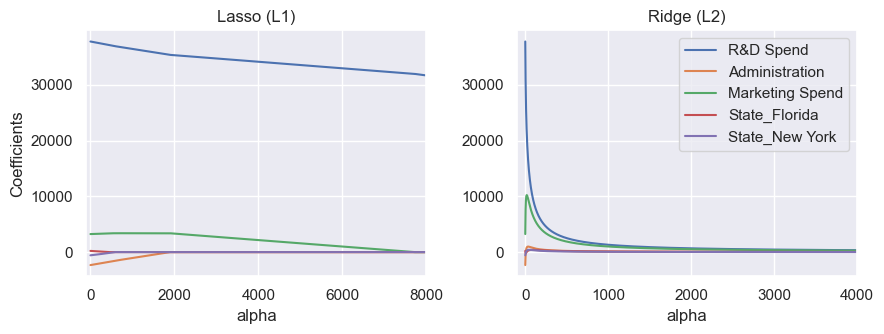

In [82]:
f, ax = plt.subplots(1, 2, figsize=(9, 3.5))

for i in range(coeffs_lasso.shape[1]):
    ax[0].plot(alpha_array, coeffs_lasso[:, i])

    ax[1].plot(alpha_array, coeffs_ridge[:, i], label=X_train.columns[i])

ax[1].legend()
ax[0].set_xlim([-100, 8000])
ax[1].set_xlim([-100, 4000])

ax[0].set_ylabel("Coefficients")
ax[0].set_xlabel("alpha")
ax[1].set_xlabel("alpha")

ax[0].set_title("Lasso (L1)")
ax[1].set_title("Ridge (L2)")

plt.tight_layout();

Vemos los efectos de las regresiones, donde en la regresión de Ridge tiende a cero todos los coeficientes, mientras que en la de Lasso, los diferentes coeficientes se van haciendo cero, en el mismo orden de cuando hicimos la selección mediante eliminación hacia atrás.

Veamos un ejemplo de dos modelos de cada uno. 

*Nota: Los valores de alpha son obtenidos con validación cruzada y búsqueda de hiperparámetros que veremos en AMq1.*

In [83]:
# Creamos los modelos
lasso_model = Lasso(alpha=871.45)
ridge_model = Ridge(alpha=1)

# Entrenamos los modelos
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Realizamos la parte de testeo
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Modelo de regresión lineal")
print("R-cuadrado en test:", r2_linear)
print("Raiz de error cuadratico medio:", rmse_linear)

print("\nModelo de regresión lineal usando eliminación hacia atrás")
print("R-cuadrado en test:", r2_stepwise)
print("Raiz de error cuadratico medio:", rmse_stepwise)

print("\nLasso")
print("R-cuadrado en test:", r2_lasso)
print("Raiz de error cuadratico medio:", rmse_lasso)

print("\nRidge")
print("R-cuadrado en test:", r2_ridge)
print("Raiz de error cuadratico medio:", rmse_ridge)

Modelo de regresión lineal
R-cuadrado en test: 0.9391786904178374
Raiz de error cuadratico medio: 9250.710386623468

Modelo de regresión lineal usando eliminación hacia atrás
R-cuadrado en test: 0.9479768860237261
Raiz de error cuadratico medio: 8555.499561653258

Lasso
R-cuadrado en test: 0.948646954210094
Raiz de error cuadratico medio: 8500.222711751876

Ridge
R-cuadrado en test: 0.9435930483208119
Raiz de error cuadratico medio: 8908.683220740364


Vemos que la regresión de Lasso nos dio mejor resultado, el cual es parecido al resultado obtenido en la selección de modelo mediante eliminación hacia atrás. Es un poco mejor, pero claramente muestra una mejora con respecto a una regresión lineal de todos los atributos.

Veamos el coeficiente del modelo de regresión Lasso, 

In [84]:
print(f"Los coeficientes de la regresión Lasso con alpha=871 son {lasso_model.coef_}")

Los coeficientes de la regresión Lasso con lambda=871 son [36565.05725482 -1206.37005016  3382.85826146     0.
    -0.        ]


Vemos que los coeficientes de la ubicación de las startups son cero. Por lo que, este modelo no tiene en cuenta esos dos valores, por lo que se puede usar el modelo sin pasar esos atributos. 

La regresión Lasso no puede encontrar el mejor modelo de solo usar los dos atributos `"R&D Spend"` y `"Marketing Spend"` porque la penalización para que la columna `"Administration"` sea cero le afecta mucho también a los valores de las columnas `"R&D Spend"` y `"Marketing Spend"`, y por consiguiente modelos Lasso sin el atributo `"Administration"` rinde peor que la regresión lineal que obtuvimos mediante selección de modelo.

Por otro lado, la regresión de Ridge no mejora el resultado obtenido. Esto se debe a que el problema que tenemos, la regresión lineal no presenta problemas de error de varianza. Ridge tiene sentido cuando tenemos muchos atributos y pocas observaciones.